# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [62]:
# Import your libraries

# General purpose:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# math
import math


# Classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [2]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv('data/fashion-small.csv')
df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0  T-shirt/top       0       0       0       0       0       0       0   
1      Trouser       0       0       0       0       0       0       0   
2        Dress       0       0       0       0       0       0       0   
3   Ankle boot       0       0       0       0       0       0       0   
4        Dress       0       0       0       0       0       0       0   

   pixel8  pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0       0  ...        66        25         0         0         0   
1       0       0  ...       170        25         0         0         0   
2       0       0  ...        76        80         0         0         0   
3       0       0  ...         0         0         0         0         0   
4      22      53  ...        79        78        18         0         2   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         1         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

### Inspect for null values

In [3]:
# 2. Inspect / remove null values. 
df.isnull().sum().sum()

0

### Check for duplicates

In [4]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()

0

### Lets look at our class balances

In [5]:
# 4. Print out the number examples in each class aka the class balances. 
df['label'].value_counts()

Sandal         646
Trouser        612
Ankle boot     605
Shirt          601
Pullover       598
Coat           597
T-shirt/top    590
Dress          585
Bag            584
Sneaker        582
Name: label, dtype: int64

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [20]:
# Grabs all of the columns 
columns = df.columns

# Convert the all columns object into a regular list
columns = columns.to_list()

# Sanity check that it is now just a list.
print(type(columns))

# Remove the label column from the list
columns.remove('label')


<class 'list'>


## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

In [27]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[columns].values

# Select just one image from all the images
img = imgs[999]

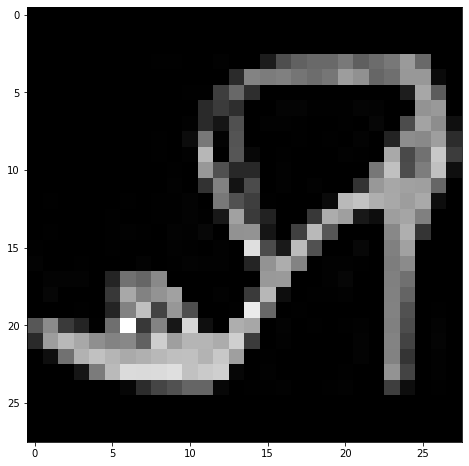

In [38]:
# # Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(math.sqrt(img.shape[0]),math.sqrt(img.shape[0])) # for this case, same as img.reshape (28,28)

plt.figure(figsize = (8,8))
# # Plot reshaped image
plt.imshow(img, cmap = 'gray')

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [43]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns
selected_features

# Convert the all columns object into a regular list
selected_features = selected_features.to_list()

# Sanity check that it is now just a list.
type(selected_features)

# Remove the label column from the list
# This happens 'in place'
selected_features.remove('label')


### 2. Define our `X` and `y`

In [45]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df['label']

### 3. Train-test-split our `X` and `y` data

In [46]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [50]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [51]:
# 2. Fit that model with our training data. 
model.fit(X_train, y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [52]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.845333


### 2. Make new predictions using our test data. 

In [60]:
### 2. Make new predictions using our test data. 
y_pred = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [63]:
### 3. Print the classification report. 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Ankle boot       0.91      0.94      0.93       167
         Bag       0.91      0.95      0.93       131
        Coat       0.78      0.79      0.78       150
       Dress       0.85      0.86      0.85       157
    Pullover       0.79      0.77      0.78       158
      Sandal       0.93      0.92      0.92       163
       Shirt       0.61      0.58      0.59       146
     Sneaker       0.90      0.88      0.89       150
 T-shirt/top       0.75      0.79      0.77       135
     Trouser       1.00      0.97      0.99       143

    accuracy                           0.85      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.85      0.84      1500



### 4. Plot the confusion matrix of our predicted results. 

In [8]:
### 4. Plot the confusion matrix of our predicted results.


### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [4]:
print('The classifier mistaked YOUR_ANSWER_HERE and YOUR_ANSWER_HERE the most.')

The classifier mistaked YOUR_ANSWER_HERE and YOUR_ANSWER_HERE the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [ ]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    ???

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

In [ ]:
# LogisticRegression


In [ ]:
# RandomForest


In [ ]:
# MultinomialNB


In [3]:
print('YOUR_ANSWER_HERE model did the best and YOUR_ANSWER_HERE model did the worst.')

 YOUR_ANSWER_HERE model did the best and YOUR_ANSWER_HERE model did the worst.
